In [1]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format
#parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

from utils.graficos import max_min_media, graficos_notas, GraficoNotasCategoria

In [2]:
dados = pd.read_csv('./dados/DADOS_ENEM_2013_TRATADOS.zip', encoding='latin1', sep=';')
dados.head()

,inscricao,idade,sexo,cor_raça,nacionalidade,status_conclusao,tipo_escola,treineiro,municipio_prova,uf_prova,...,nota_lc,nota_mt,tipo_lingua,status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nota_redacao
0,210061103945,6,F,1,1,1,1,0,Caxias do Sul,RS,...,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00
1,210060214087,2,F,3,1,2,2,0,Fortaleza,CE,...,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00
2,210059980948,3,F,3,1,2,2,0,Quixadá,CE,...,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00
3,210060801601,11,M,1,1,1,1,0,Batatais,SP,...,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00
4,210059085130,8,M,3,1,1,1,0,Natal,RN,...,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00


In [3]:
dados[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].describe()

,nota_cn,nota_ch,nota_lc,nota_mt,nota_redacao
count,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00
mean,495.92,526.21,520.30,534.03,626.61
std,87.77,86.79,74.11,131.52,209.03
min,0.00,0.00,0.00,0.00,0.00
25%,440.60,471.20,473.70,431.40,520.00
50%,494.00,532.90,524.90,523.80,620.00
75%,551.30,586.90,571.80,630.30,780.00
max,868.40,823.00,820.80,958.60,1000.00


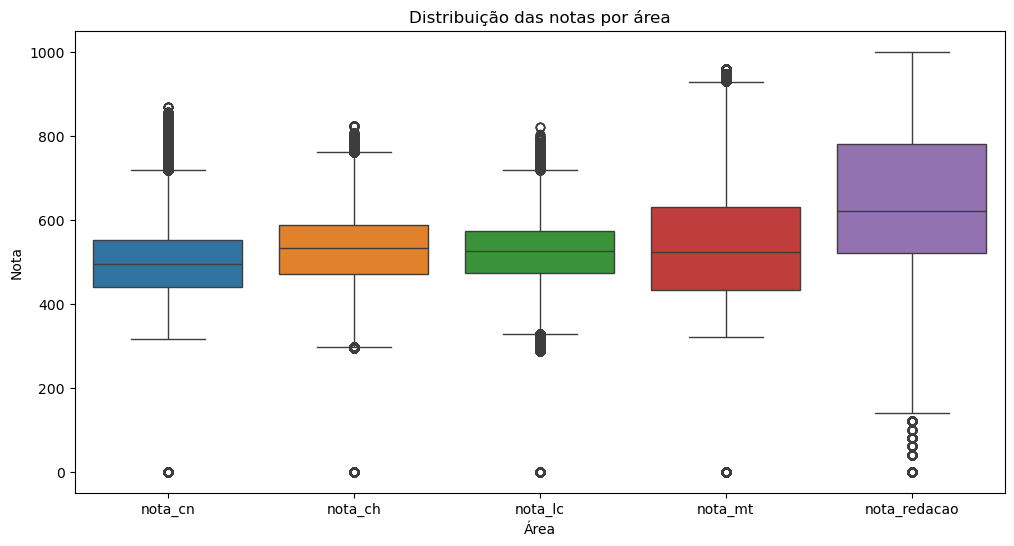

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']])
plt.title('Distribuição das notas por área')
plt.xlabel('Área')
plt.ylabel('Nota')
plt.show()

<Axes: >

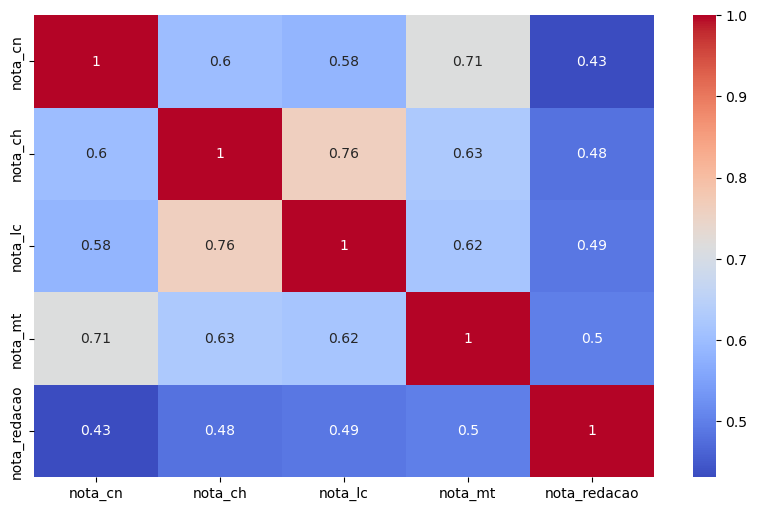

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(dados[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].corr(), annot=True, cmap='coolwarm')

In [6]:
raca = {
    0: 'ND',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'S/info'
}
dados['cor_raca_label'] = dados['cor_raça'].map(raca)

faixa_etaria = {
    1: '-17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: '26-30',
    12: '31-35',
    13: '36-40',
    14: '41-45',
    15: '46-50',
    16: '51-55',
    17: '56-60',
    18: '61-65',
    19: '66-70',
    20: '70+'
}
dados['faixa_idade'] = dados['idade'].map(faixa_etaria)
dados['faixa_idade'] = pd.Categorical(dados['faixa_idade'], categories=faixa_etaria.values(), ordered=True)

escola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}
dados['tp_escola'] = dados['tipo_escola'].map(escola)

treineiro = {
    0: 'Não',
    1: 'Sim'
}
dados['in_treineiro'] = dados['treineiro'].map(treineiro)

Maior nota em Linguagens e Códigos: 820.80
Menor nota em Linguagens e Códigos: 0.00
Média geral em Linguagens e Códigos: 520.30


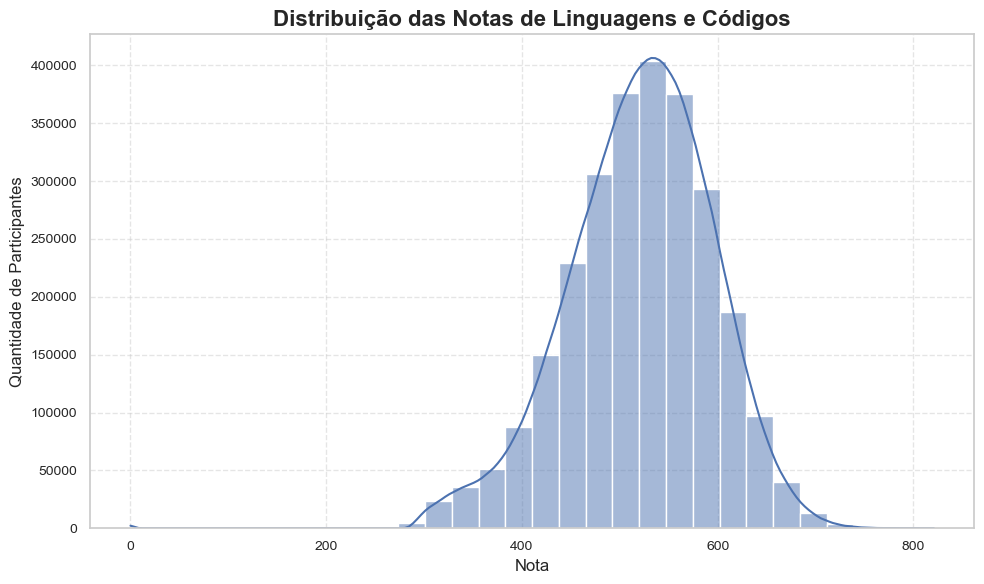

In [7]:
lc = max_min_media(dados, 'nota_lc')
lc.exibir()
grafico_lc = graficos_notas(dados, 'nota_lc', 'Distribuição das Notas de Linguagens e Códigos')
grafico_lc.plot()

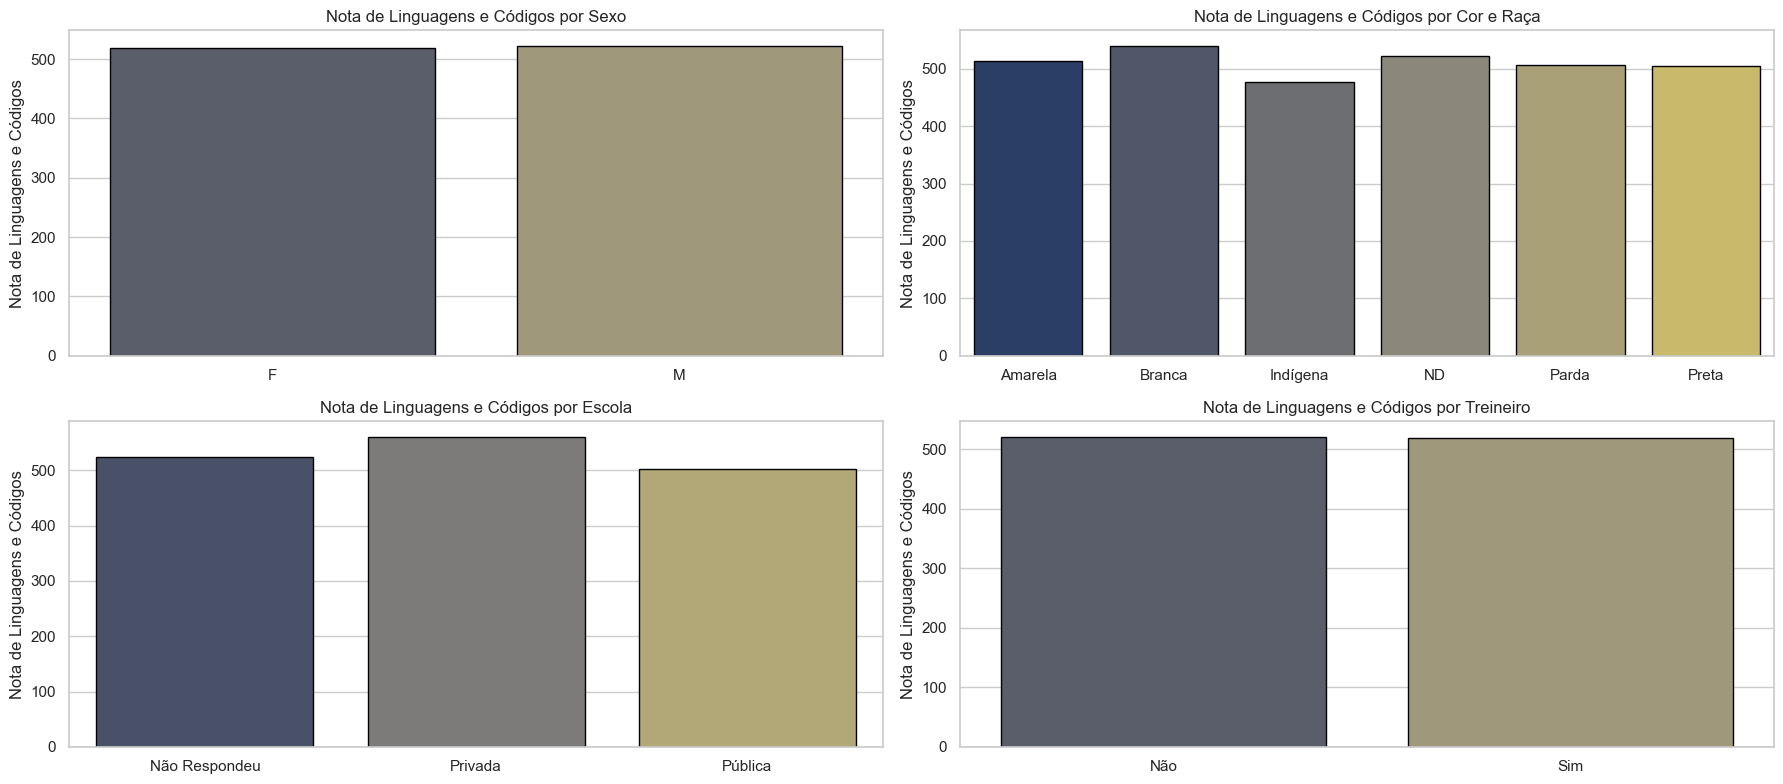

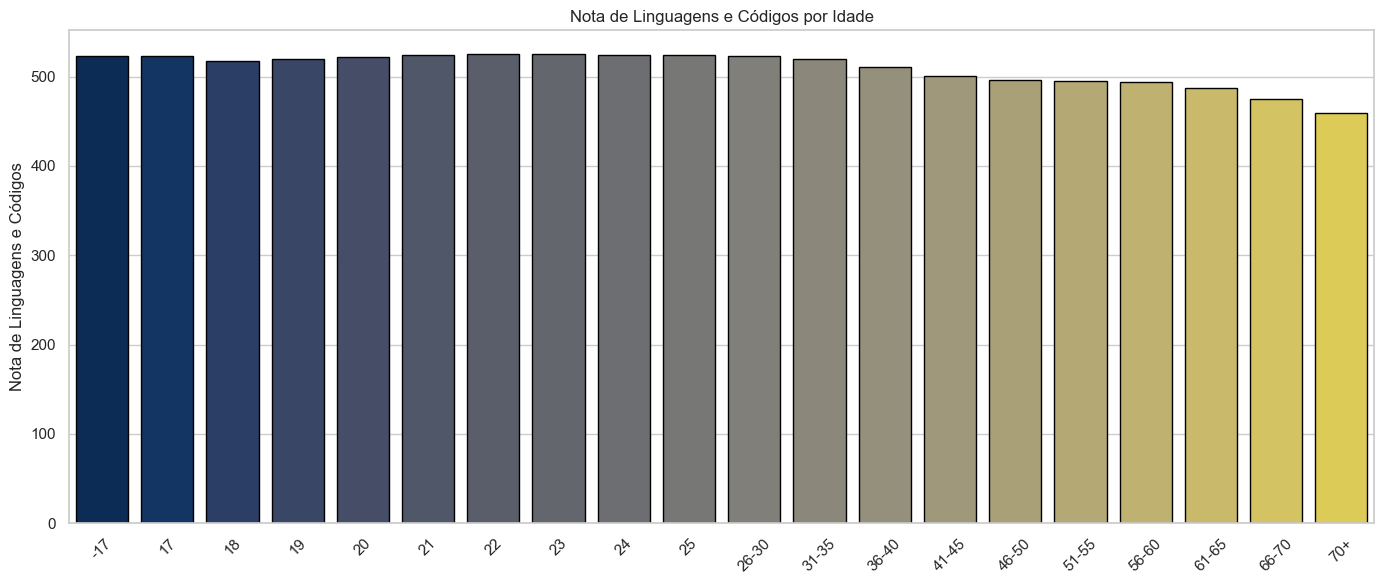

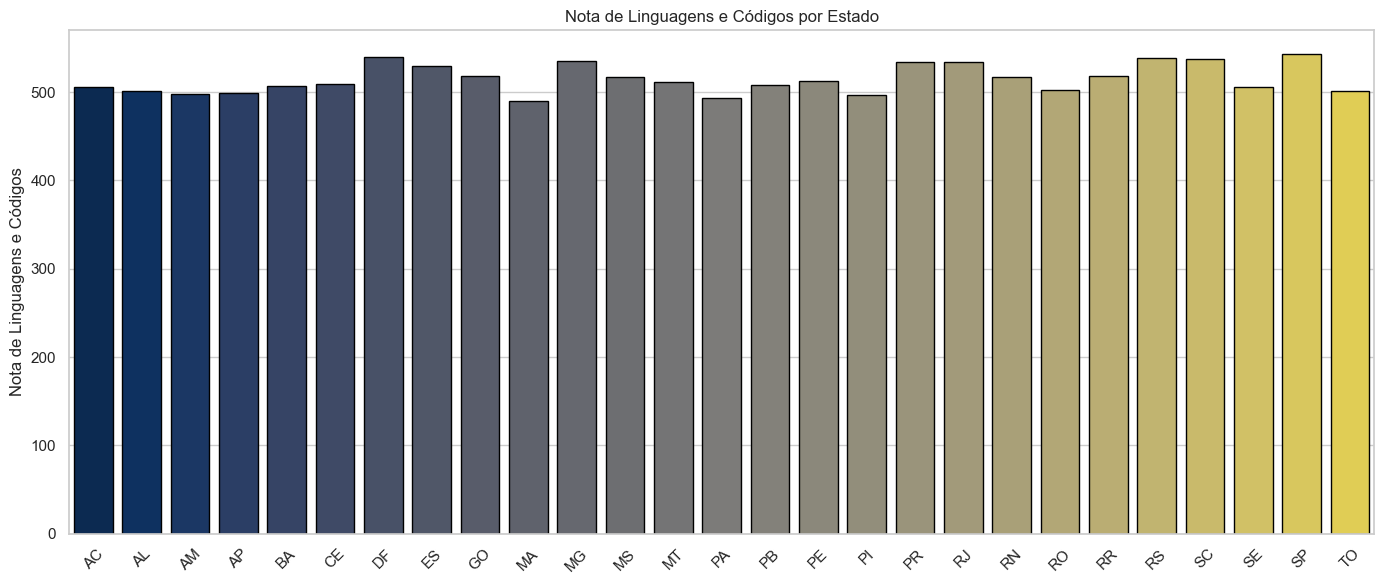

In [8]:
lc_grap = GraficoNotasCategoria(dados, faixa_etaria, 'nota_lc', "Linguagens e Códigos")
lc_grap.gerar_graficos()

Maior nota em Ciências Humanas: 823.00
Menor nota em Ciências Humanas: 0.00
Média geral em Ciências Humanas: 526.21


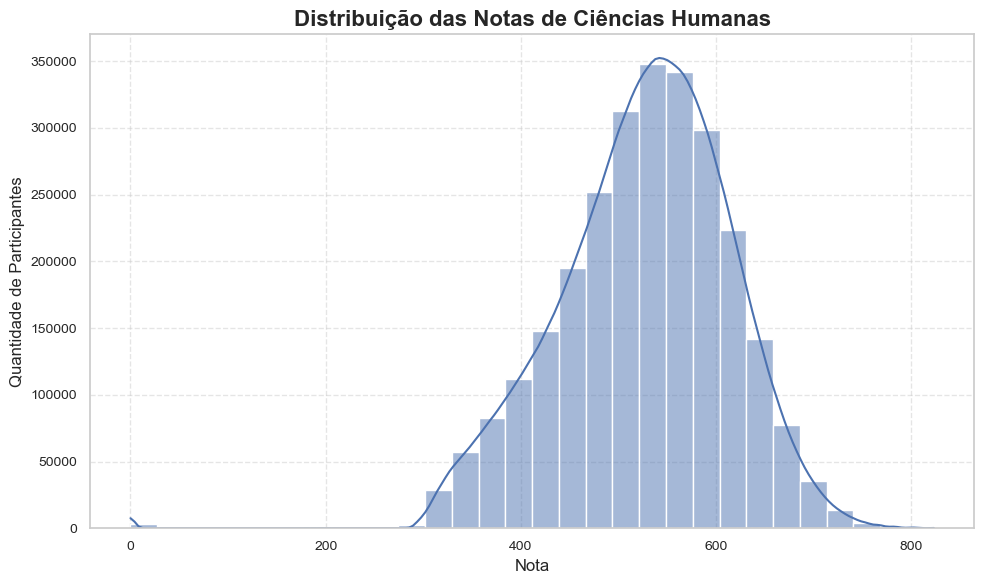

In [9]:
ch = max_min_media(dados, 'nota_ch')
ch.exibir()
grafico_ch = graficos_notas(dados, 'nota_ch', 'Distribuição das Notas de Ciências Humanas')
grafico_ch.plot()

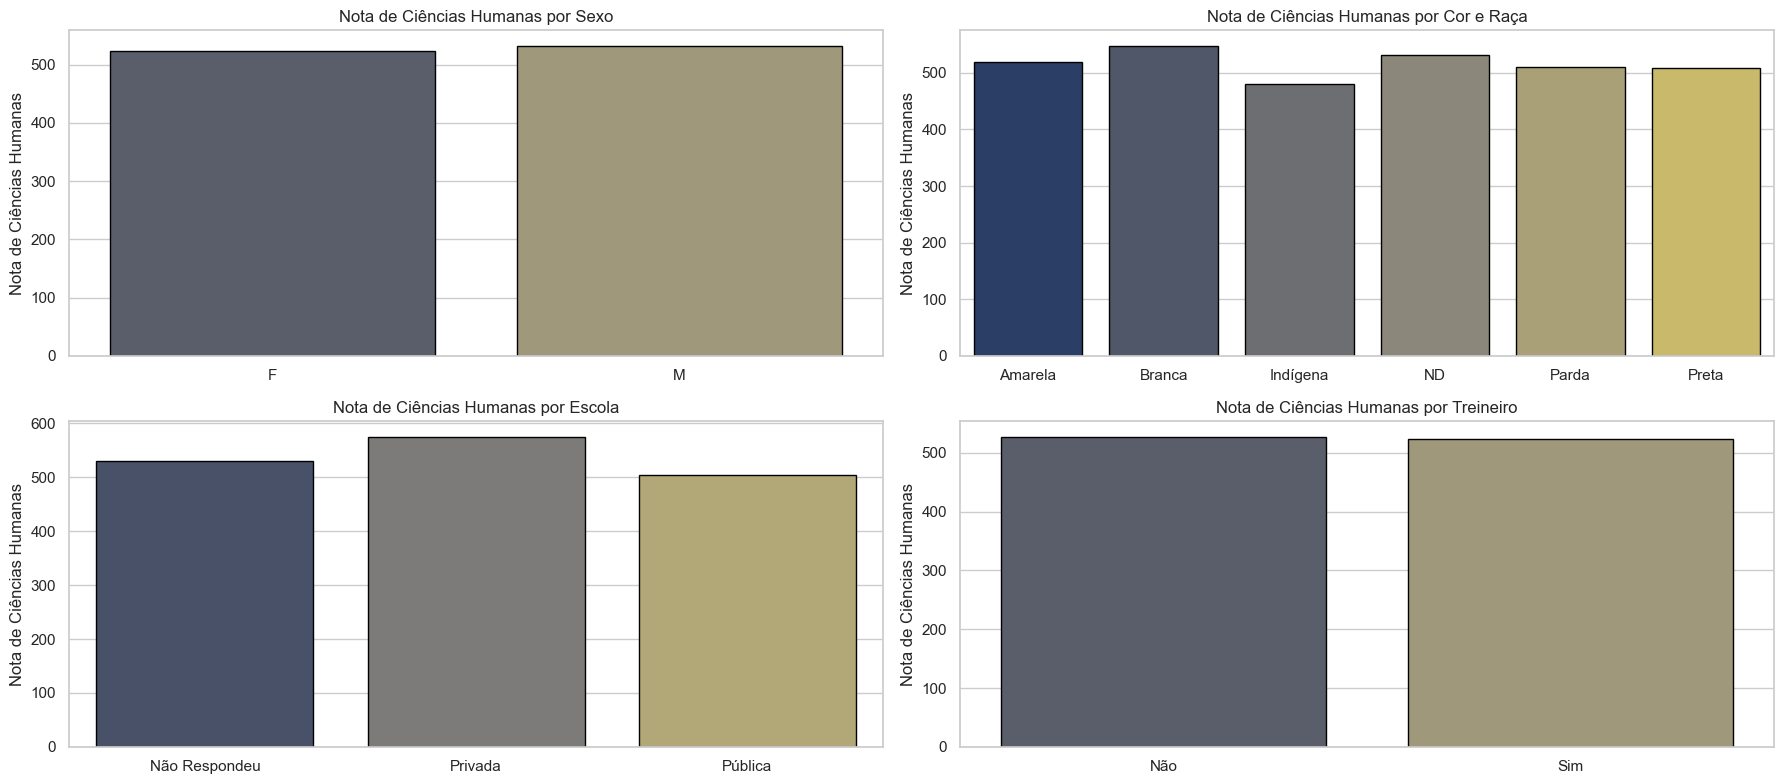

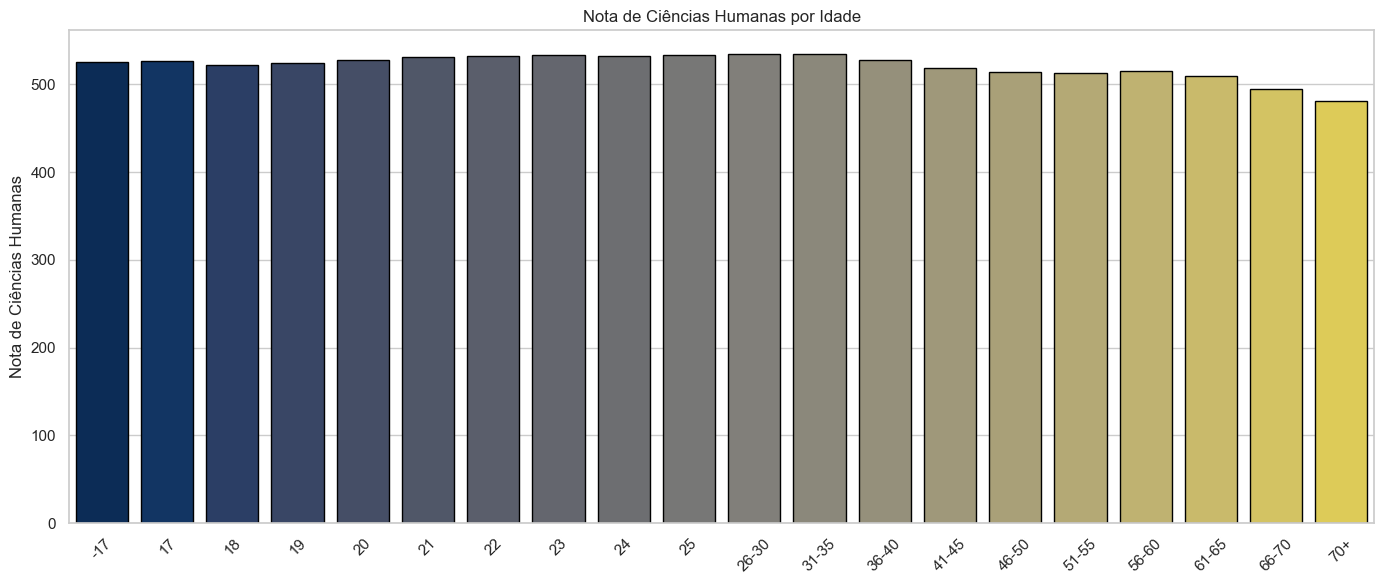

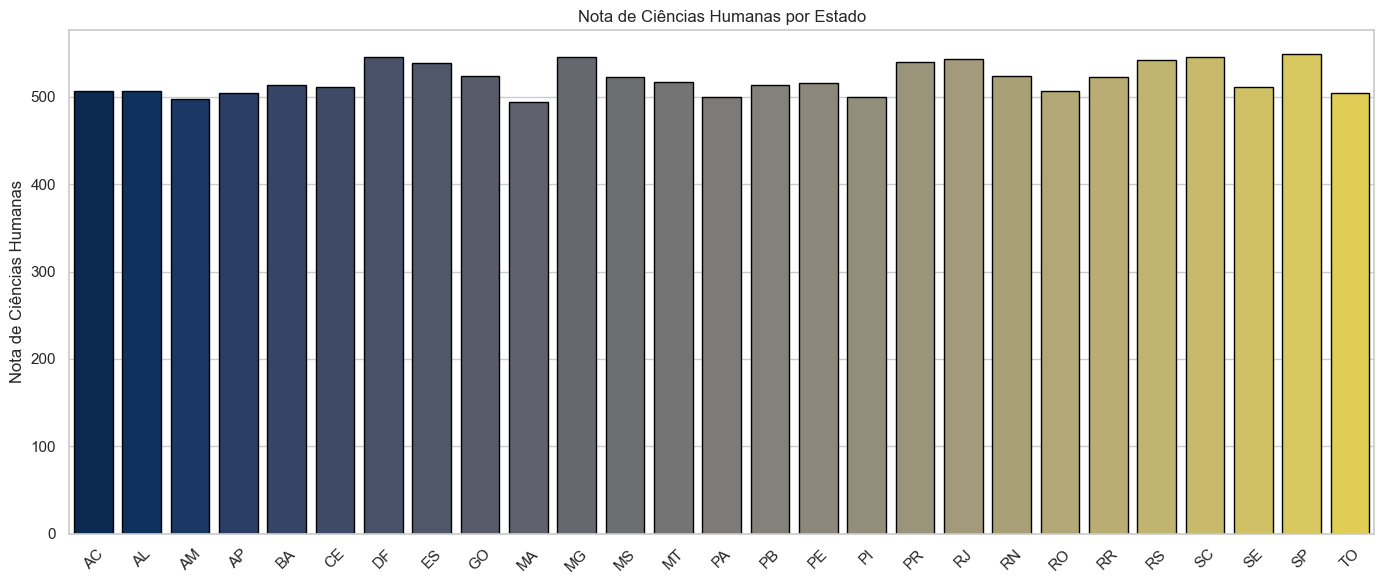

In [10]:
ch_grap = GraficoNotasCategoria(dados, faixa_etaria, 'nota_ch', "Ciências Humanas")
ch_grap.gerar_graficos()

Maior nota em Ciências da Natureza: 868.40
Menor nota em Ciências da Natureza: 0.00
Média geral em Ciências da Natureza: 495.92


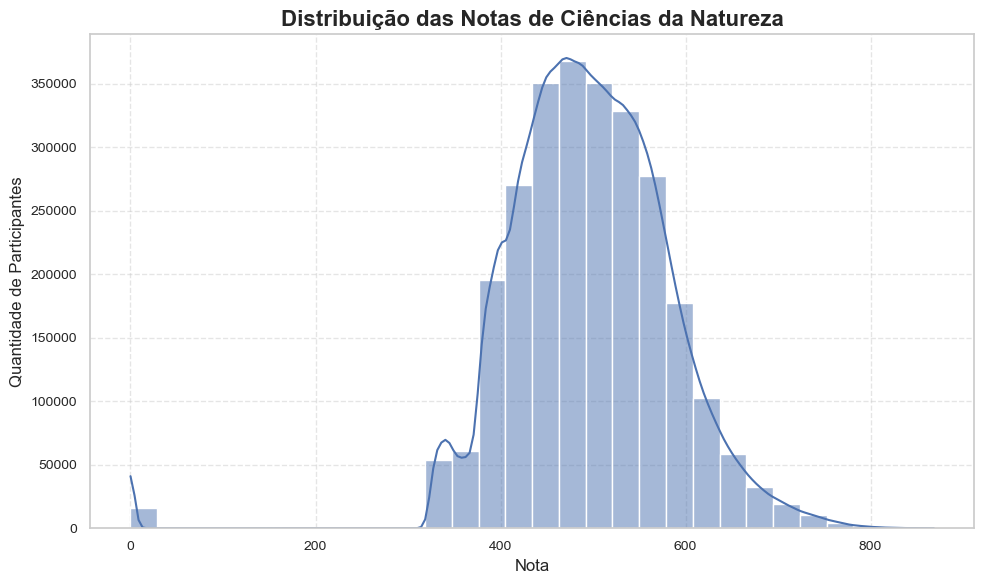

In [11]:
cn = max_min_media(dados, 'nota_cn')
cn.exibir()
grafico_cn = graficos_notas(dados, 'nota_cn', 'Distribuição das Notas de Ciências da Natureza')
grafico_cn.plot()

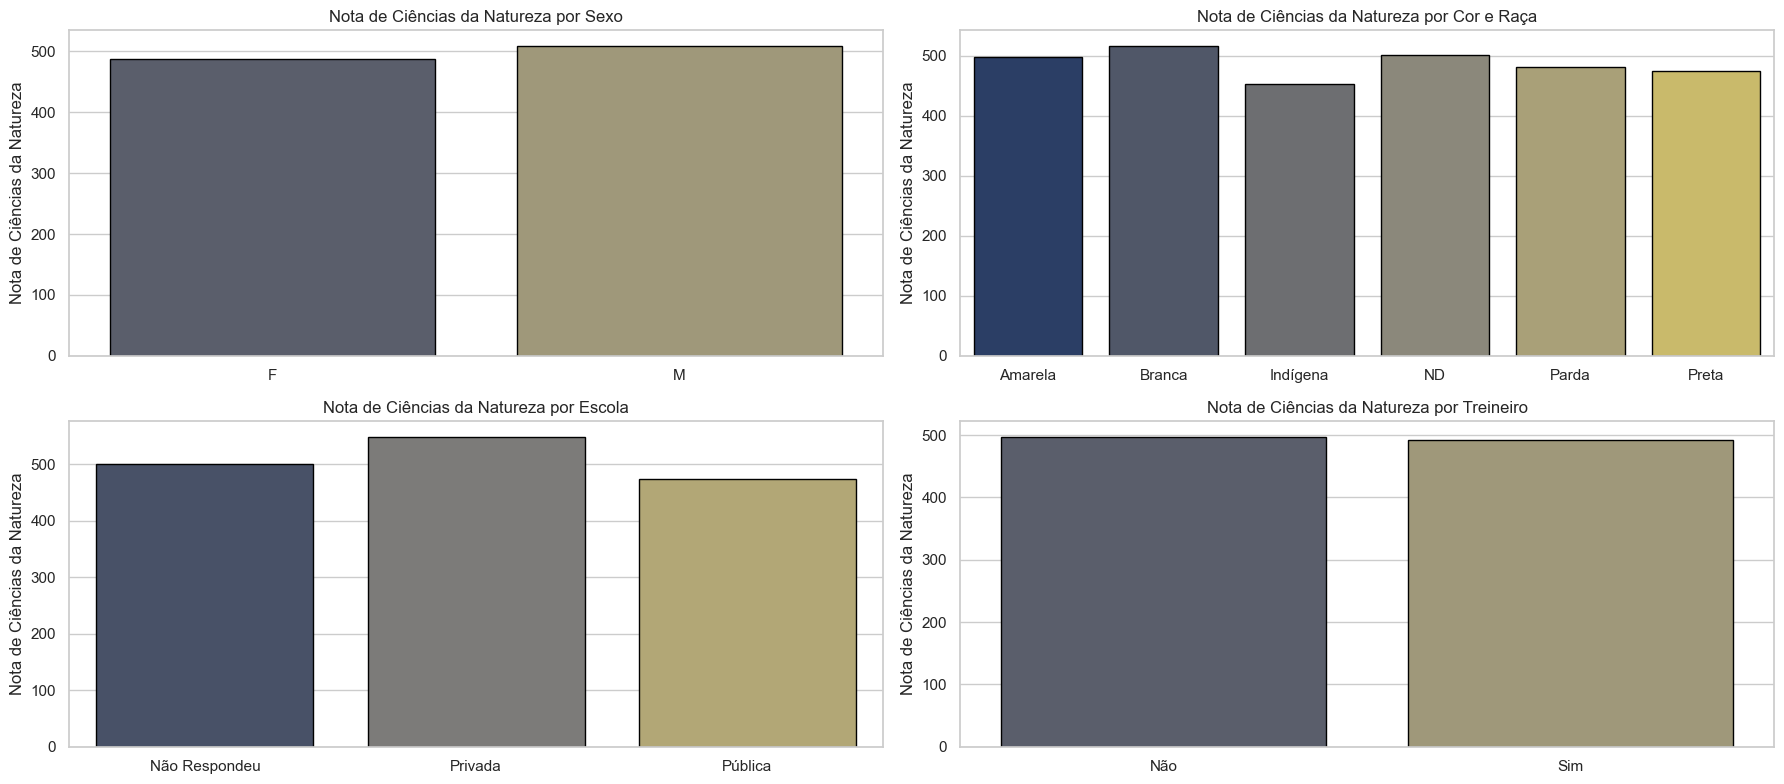

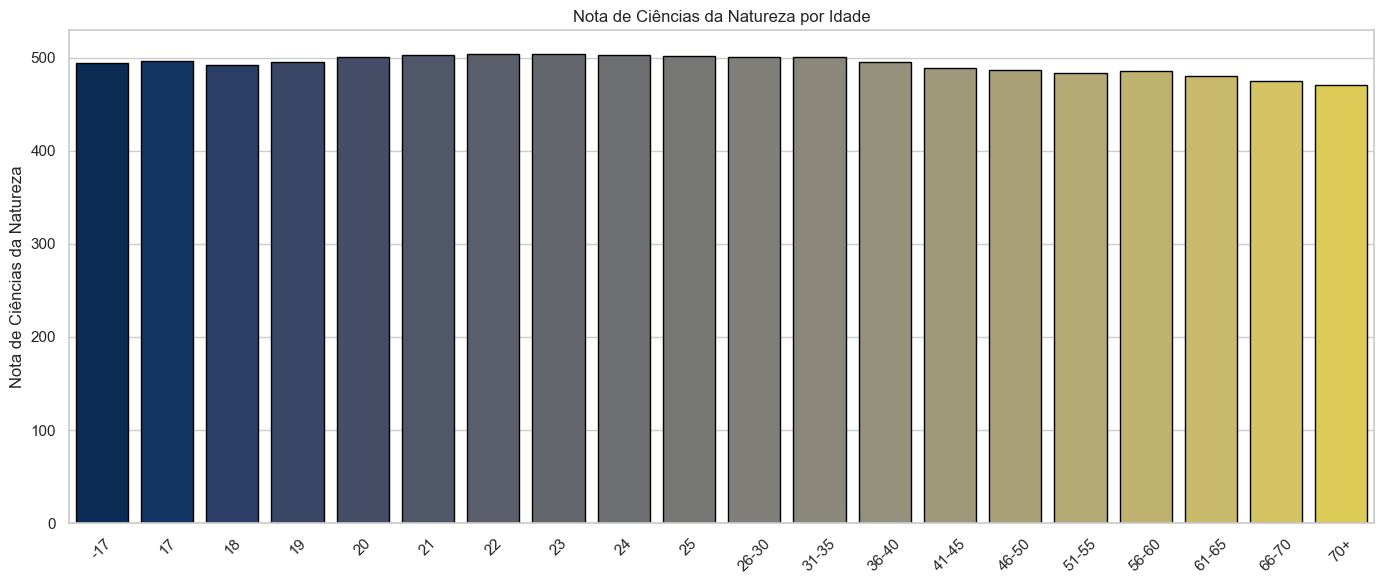

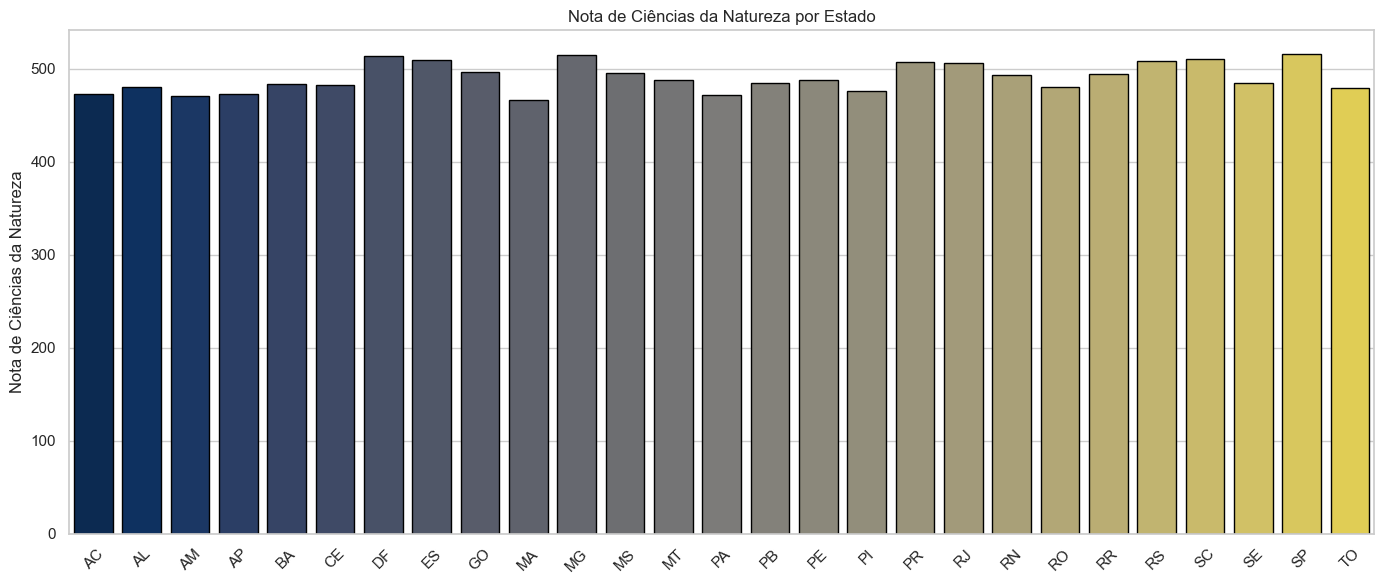

In [12]:
cn_grap = GraficoNotasCategoria(dados, faixa_etaria, 'nota_cn', "Ciências da Natureza")
cn_grap.gerar_graficos()

Maior nota em Matemática e suas tecnologias: 958.60
Menor nota em Matemática e suas tecnologias: 0.00
Média geral em Matemática e suas tecnologias: 534.03


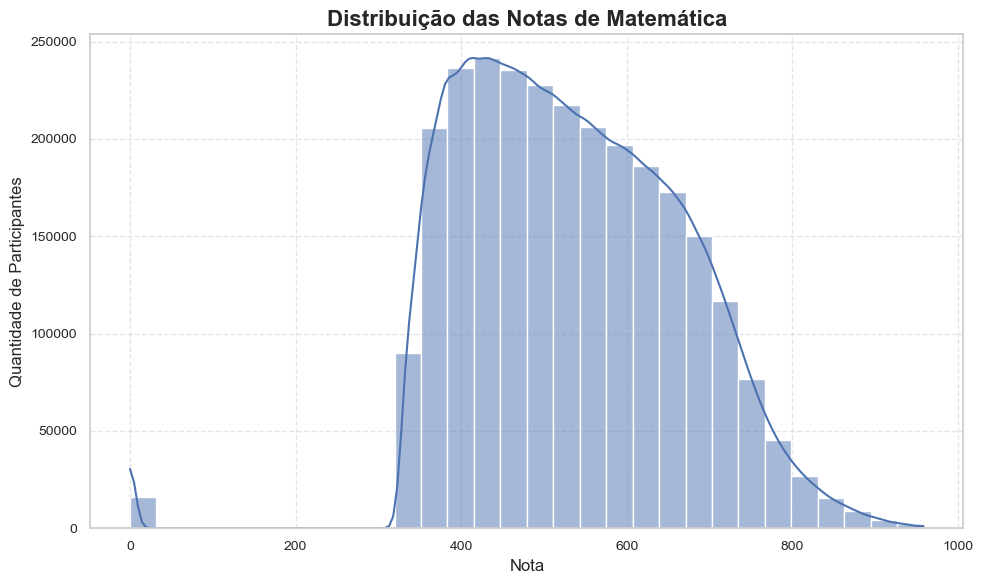

In [13]:
mt = max_min_media(dados, 'nota_mt')
mt.exibir()
grafico_mt = graficos_notas(dados, 'nota_mt', 'Distribuição das Notas de Matemática')
grafico_mt.plot()

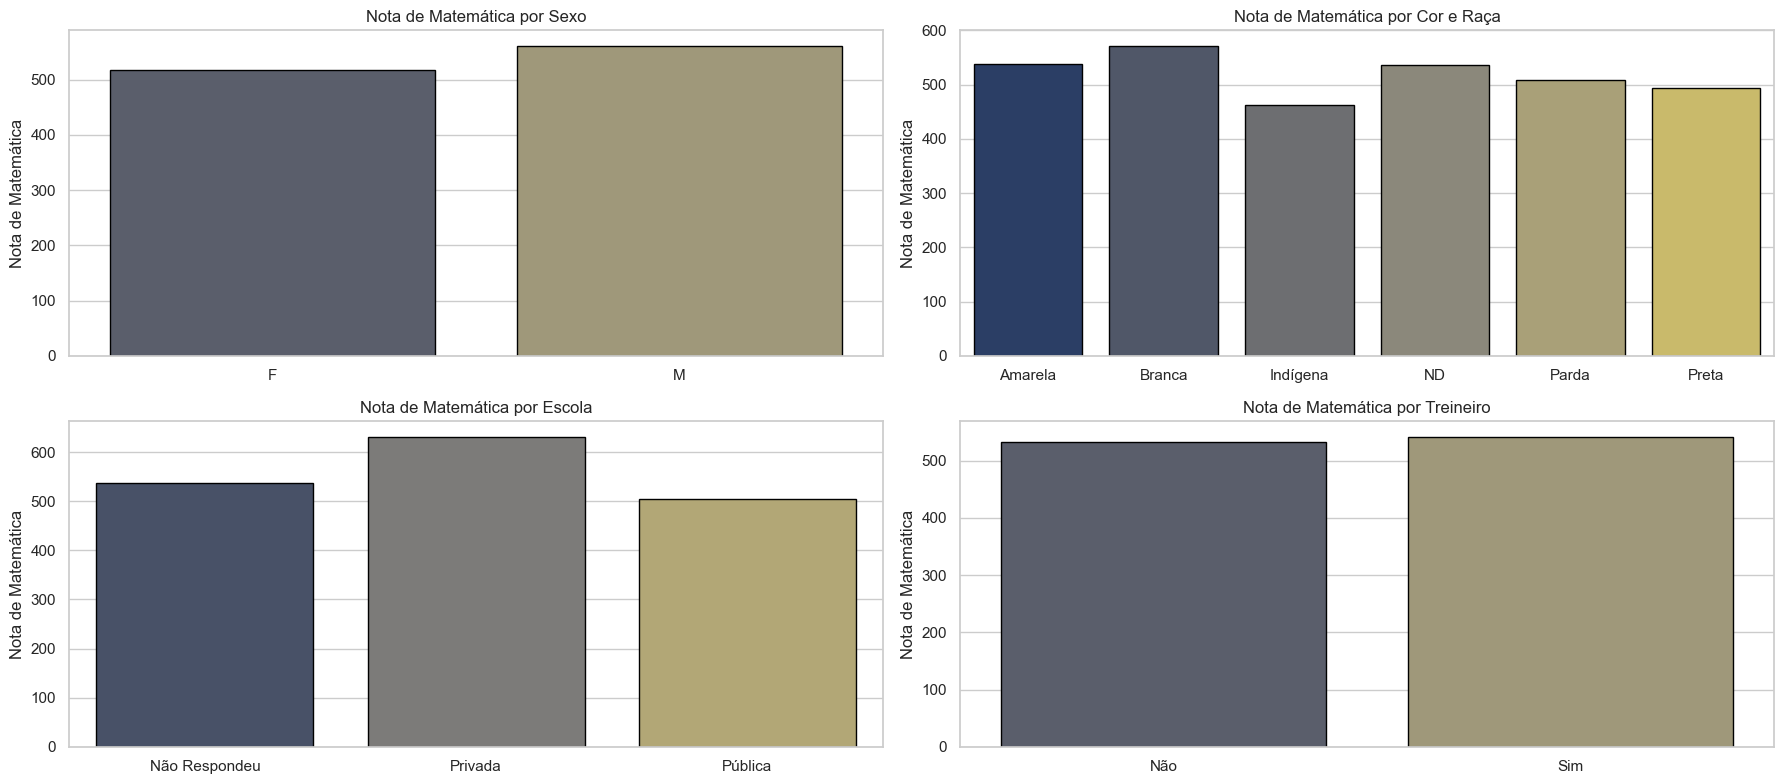

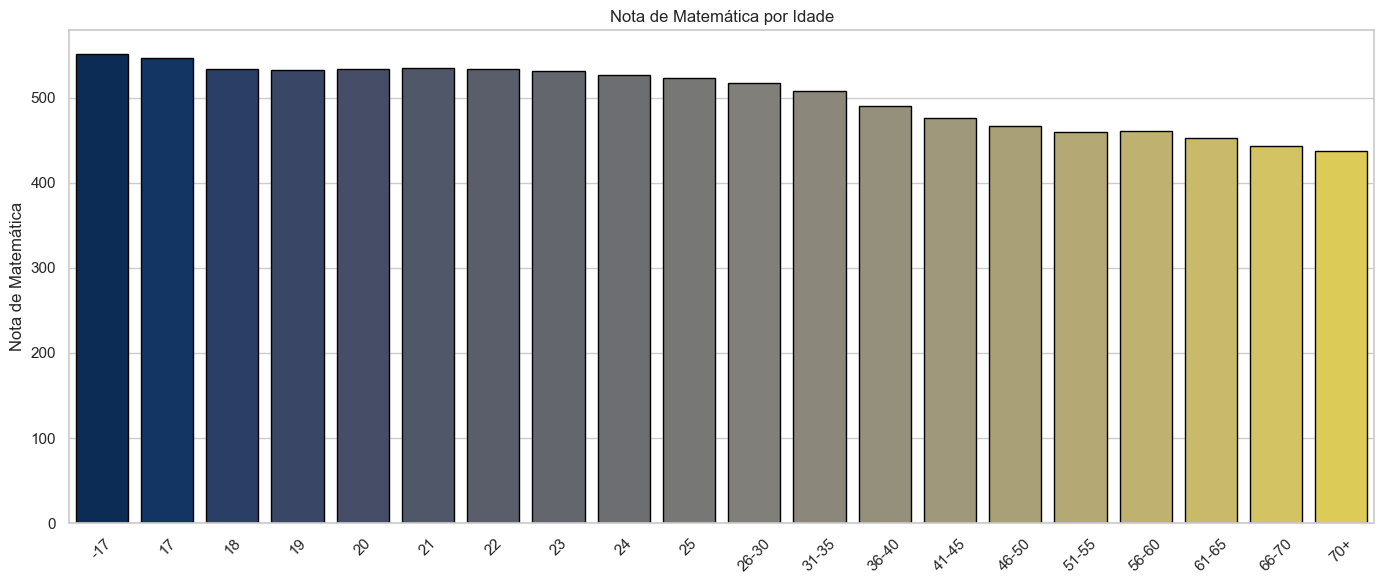

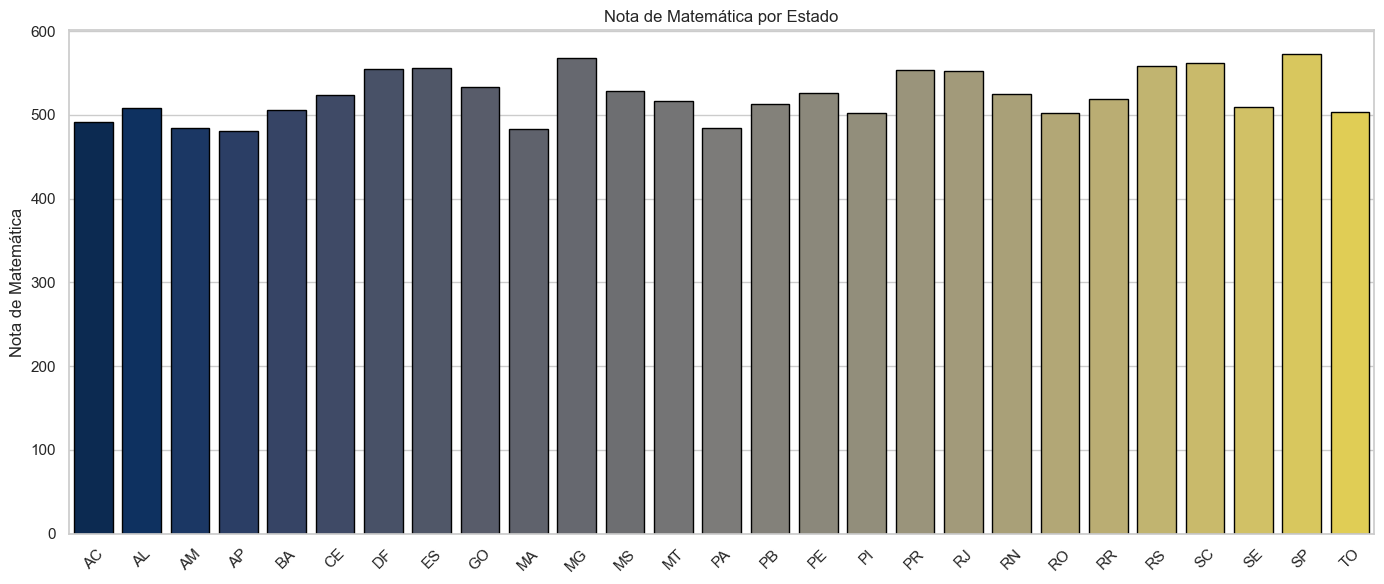

In [14]:
mt_grap = GraficoNotasCategoria(dados, faixa_etaria, 'nota_mt', "Matemática")
mt_grap.gerar_graficos()

Maior nota de Redação: 1000.00
Menor nota de Redação: 0.00
Média geral de Redação: 626.61


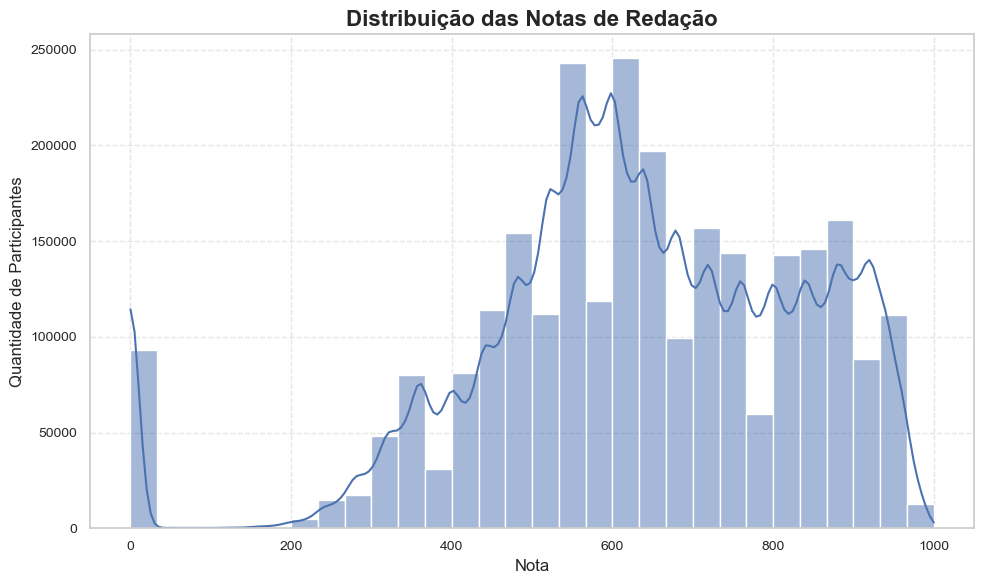

In [15]:
rd = max_min_media(dados, 'nota_redacao')
rd.exibir()
grafico_rd = graficos_notas(dados, 'nota_redacao', 'Distribuição das Notas de Redação')
grafico_rd.plot()

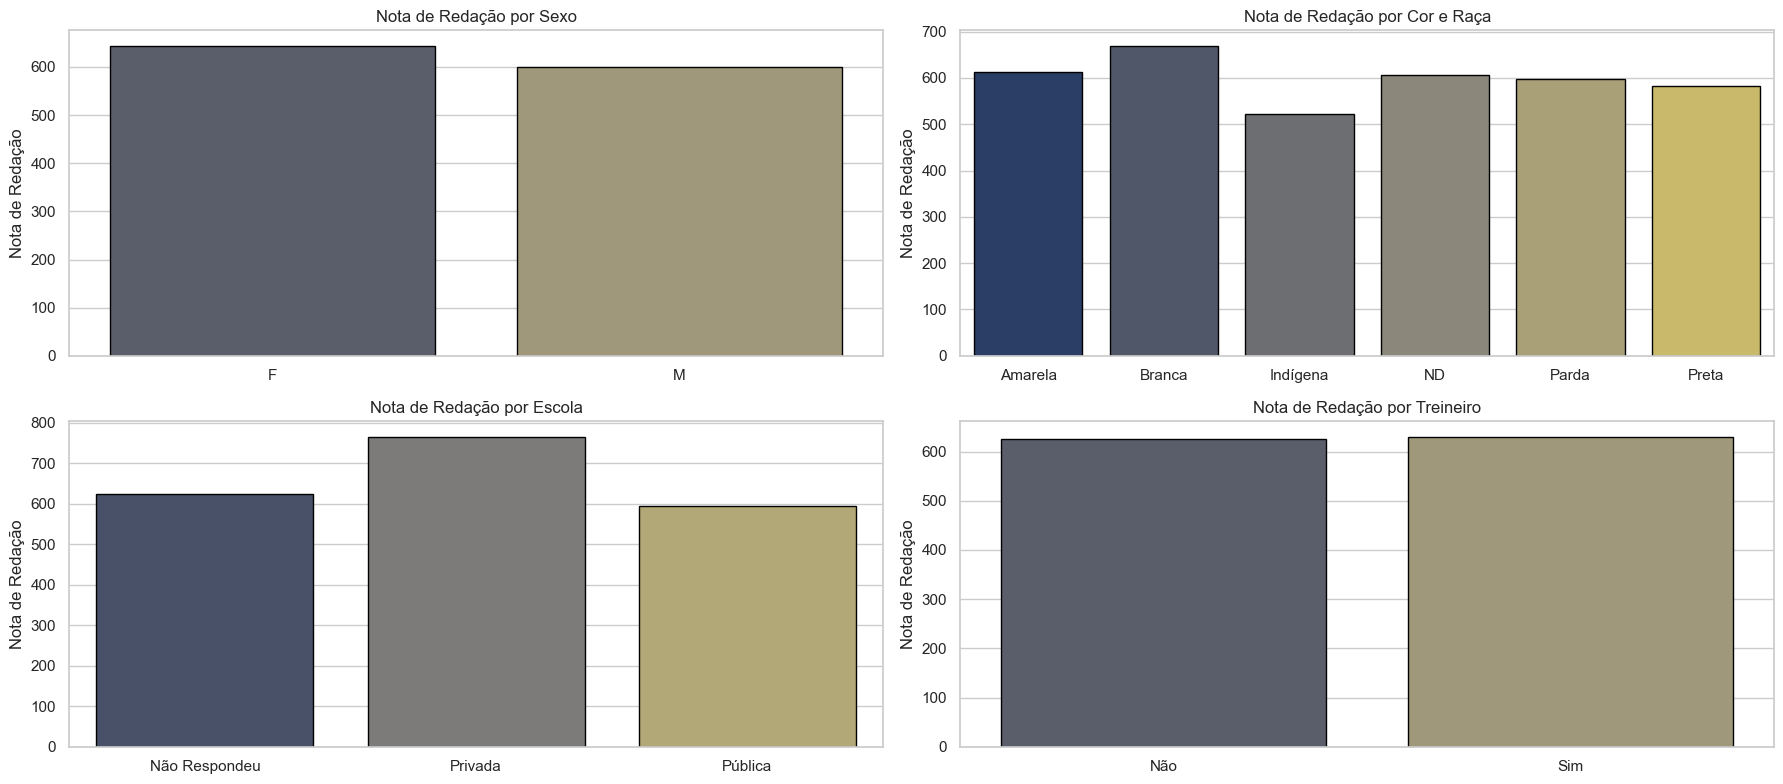

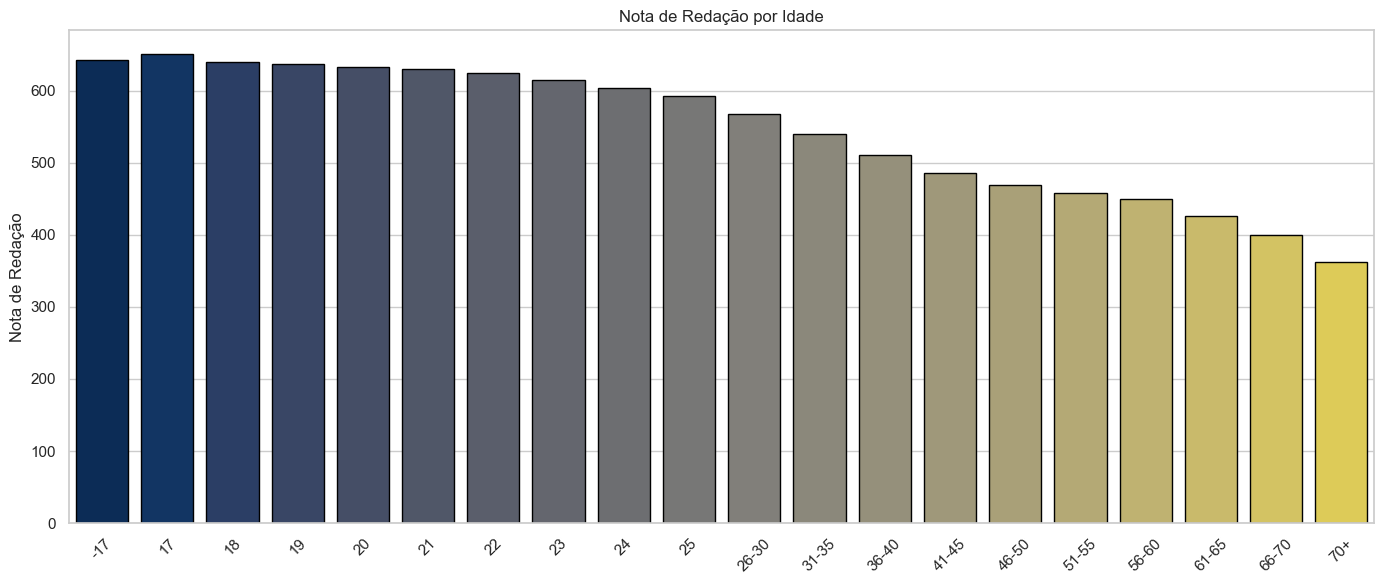

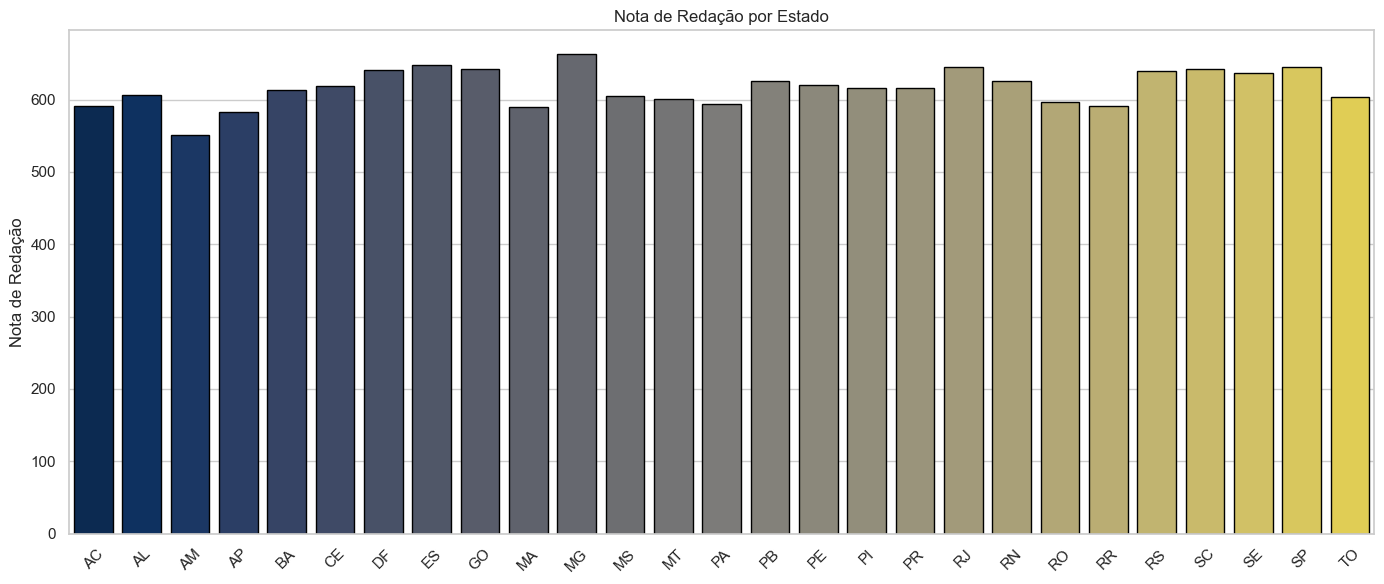

In [16]:
rd_grap = GraficoNotasCategoria(dados, faixa_etaria, 'nota_redacao', "Redação")
rd_grap.gerar_graficos()

In [17]:
redac_mil = dados[dados['nota_redacao'] == 1000]
redac_mil.shape
#o total foi 60, porém o que esta falntando, faltou no segundo dia, e foi retirado.

(59, 30)

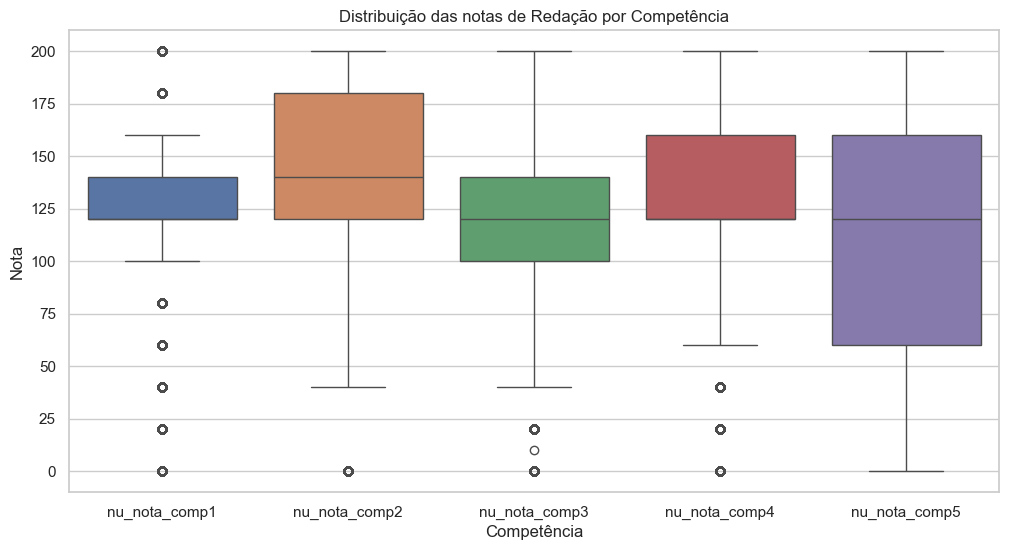

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados[['nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4', 'nu_nota_comp5']])
plt.title('Distribuição das notas de Redação por Competência')
plt.xlabel('Competência')
plt.ylabel('Nota')
plt.show()

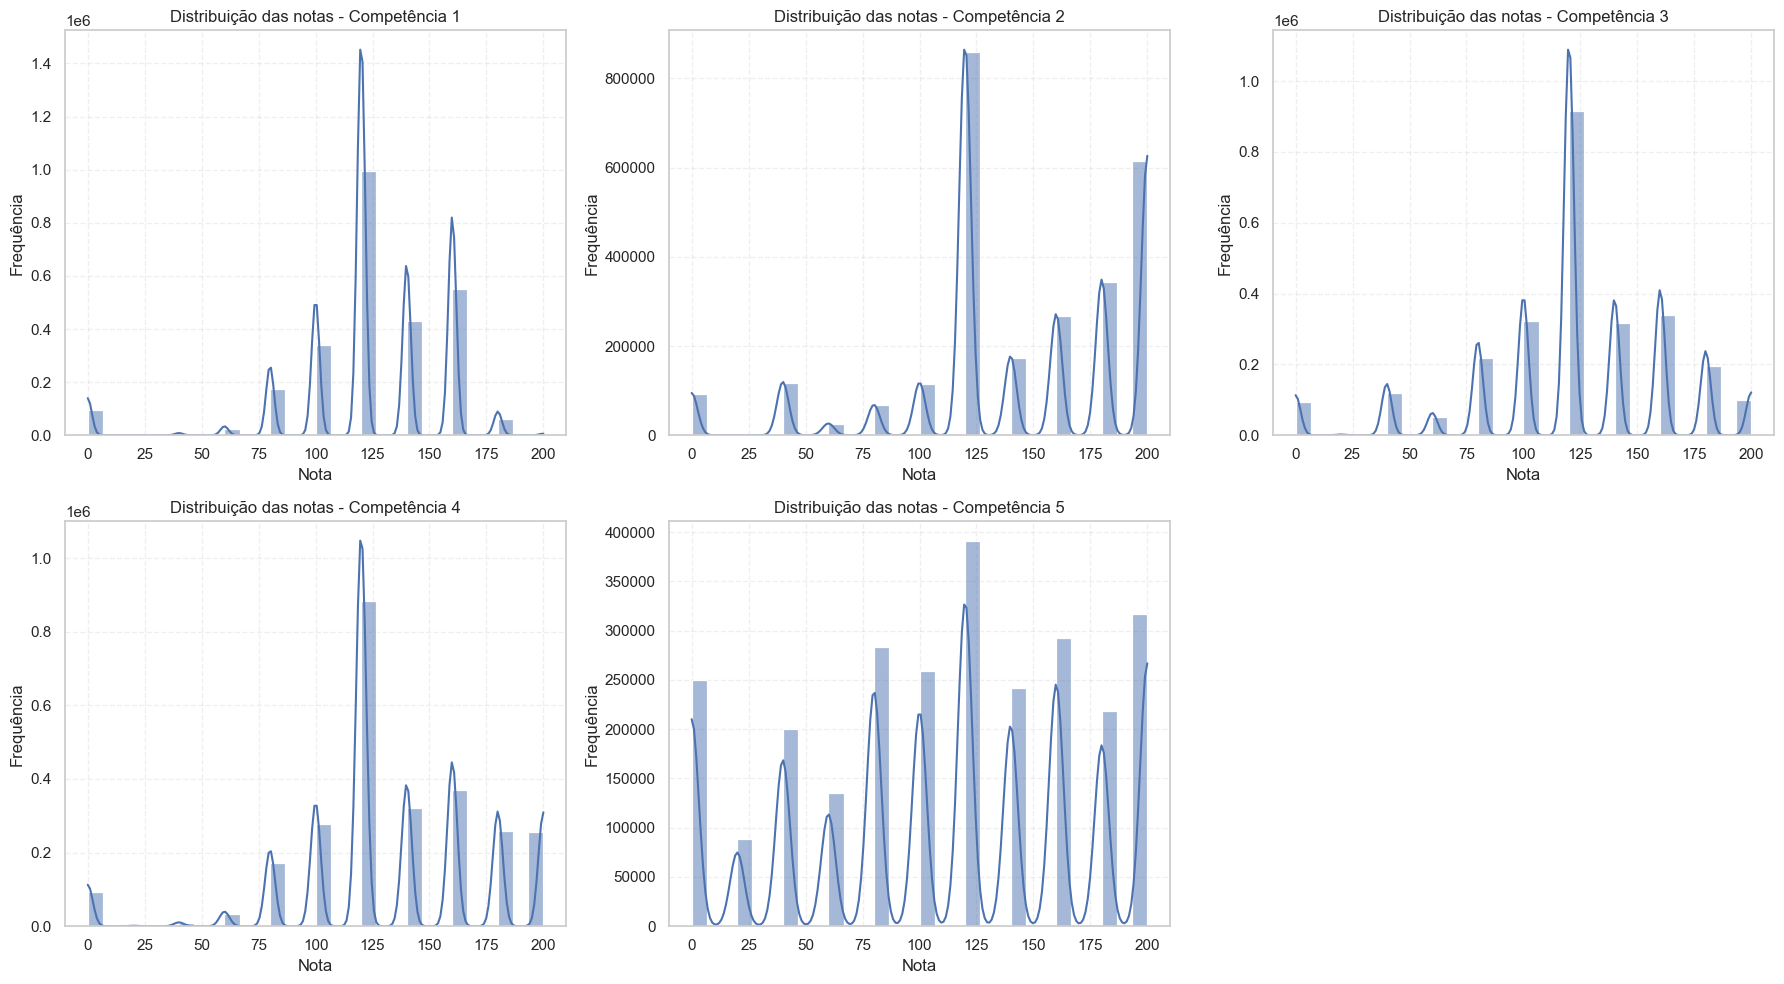

In [19]:
competencias = [
    ('nu_nota_comp1', 'Competência 1'),
    ('nu_nota_comp2', 'Competência 2'),
    ('nu_nota_comp3', 'Competência 3'),
    ('nu_nota_comp4', 'Competência 4'),
    ('nu_nota_comp5', 'Competência 5'),
]

plt.figure(figsize=(18, 10))

for i, (col, titulo) in enumerate(competencias):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=dados, x=col, kde=True, bins=30, color="#4C72B0", edgecolor='white')
    plt.title(f'Distribuição das notas - {titulo}', fontsize=12)
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()